test1.tif , format = (3, 512, 512)
Pearson coef, pvalue: (0.76199767756664705, 0.0)
test2.tif , format = (3, 512, 512)
Pearson coef, pvalue: (0.74781335454502318, 0.0)
test3.tif , format = (3, 512, 512)
Pearson coef, pvalue: (0.72028028623932339, 0.0)
test4.tif , format = (3, 512, 512)
Pearson coef, pvalue: (0.17330807423529637, 0.0)
test.tif , format = (3, 512, 512)
Pearson coef, pvalue: (0.75068466561840519, 0.0)


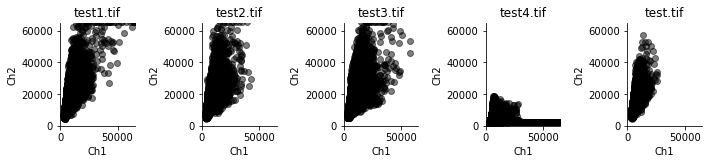

In [2]:
# Pearson correlation coefficient for quantifying colocalisation of diffuse signal in images

import os
import tifffile
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 

# specify directory of images
indir = ('/Users/joshtitlow/tmp/coloc/')
infiles = os.listdir(indir)

# create a figure and start counting
fig = plt.figure(figsize = (10,10))
n = 1

# create a df and a list to store filename and PCC values
df = pd.DataFrame()
filename = []
PCC = []


# analyse each file in the directory
for file in infiles: 
    if file.endswith('.tif'):
        if not file.startswith('._'):
            
            # read image file and show data structure
            im = tifffile.imread(os.path.join(indir, file))
            print file, ', format =', im.shape
            filename.append(file)
            
            # load channels into a flattened array
            ch1 = im[0].flatten()
            ch2 = im[1].flatten()

            # Perform pearson correlation analysis (returns coefficient and p-value)
            pearson = stats.pearsonr(ch1, ch2)
            print 'Pearson coef, pvalue:', pearson
            PCC.append(pearson[0])
        
            # plot the data
            #ax = plt.subplot(111)
            ax = fig.add_subplot(5,5,n)
            ax.scatter(ch1,ch2, c='black', alpha=0.5)
            ax.set_title(file)
            ax.set_xlabel('Ch1')
            ax.set_ylabel('Ch2')
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            plt.xlim(0, 65000)
            plt.ylim(0, 65000)
            
            # iterate
            n+=1

# plot the data and save results
plt.tight_layout()

plt.savefig('PCC_figs.png')
plt.show(fig)


df['filename'] = filename
df['PCC'] = PCC
df.to_csv('PCC_values.csv', index=False)

In [61]:
# Determining localisation of spots within a mask

# Requires binary image mask and FQ spots file
# -can be modified for any table of centroid coordinates

import os
import tifffile
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 

# specify the FQ centroid file
FQ_file = '/Users/joshtitlow/tmp/coloc/syp_coloc/msp300_smFISH__spots.txt'

# read the FQ file from the metadata header to get pixel size
px_size = pd.read_csv(FQ_file, sep='\t', header=10, nrows=2)
px_xy = px_size['Pix-XY'].iloc[0]
px_z = px_size['Pix-Z'].iloc[0]

# read the FQ file from the data header to get centroid positions
centroid_file = pd.read_csv(FQ_file, sep='\t', header=18)

# convert spatial dimensions to pixel dimensions
centroid_file['X_pix'] = np.ceil(centroid_file['Pos_X'].div(float(px_xy)))
centroid_file['Y_pix'] = np.ceil(centroid_file['Pos_Y'].div(float(px_xy)))
centroid_file['Z_pix'] = np.ceil(centroid_file['Pos_Z'].div(float(px_z)))

# create lists to store spot localisation compartment
spot_loc = []

# read image file and show data structure
mask = tifffile.imread('/Users/joshtitlow/tmp/coloc/syp_coloc/DAPI_mask.tif')
print mask.shape
print mask[20,255,255]

# start counting so the plt
n = 1

# index rows in the FQ.csv file to get file names and pixel coordinates
for index, row in centroid_file.iterrows():
    x = row['X_pix'] 
    y = row['Y_pix']
    z = row['Z_pix']
    loc = mask[z, y, x]
    #print loc
    if loc == 1:
        spot_loc.append('nucleus')
    if loc == 0:
        spot_loc.append('cytosol')
        
# write basic statistics to centroid file
centroid_file['spot_loc'] = spot_loc

#centroid_file = pd.DataFrame(mean_pixels, columns=["column"])
centroid_file.to_csv('test_list.csv', index=False)

(39, 956, 956)
0


//anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:46: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [54]:
print spot_loc.count('cytosol')
print spot_loc.count('nucleus')

307
77


In [46]:
if loc == 1:
    print 'yes'
if loc == 0:
    print 'no'

no


In [1]:
# Determining localisation of spots within a mask

# Requires binary image mask and FQ spots file
# -can be modified for any table of centroid coordinates

import os
import tifffile
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 

# specify directory of images
indir = ('/Users/joshtitlow/tmp/smFISH_data/')
infiles = os.listdir(indir)

# create a df and a list to store filename and spot localisations
df = pd.DataFrame()
filename = []
nuc_spots = []
cytosol_spots = []

# analyse each file in the directory
for file in infiles: 
    if file.endswith('.tiff'):
        if not file.startswith('._'):
            
            # specify the FQ centroid file and mask file
            FQ_file = os.path.join(indir, 'smFISH_channel/', file.replace('.tiff', '__spots.txt'))
            mask = tifffile.imread(os.path.join(indir, 'masks/', file.replace('.tiff', '.tif')))

            # append filename to list
            filename.append(file)

            # read the FQ file from the metadata header to get pixel size
            px_size = pd.read_csv(FQ_file, sep='\t', header=10, nrows=2)
            px_xy = px_size['Pix-XY'].iloc[0]
            px_z = px_size['Pix-Z'].iloc[0]

            # read the FQ file from the data header to get centroid positions
            centroid_file = pd.read_csv(FQ_file, sep='\t', header=18)

            # convert spatial dimensions to pixel dimensions
            centroid_file['X_pix'] = np.ceil(centroid_file['Pos_X'].div(float(px_xy)))
            centroid_file['Y_pix'] = np.ceil(centroid_file['Pos_Y'].div(float(px_xy)))
            centroid_file['Z_pix'] = np.ceil(centroid_file['Pos_Z'].div(float(px_z)))

            # create lists to store spot localisation compartment
            spot_loc = []

            # index rows in the FQ.csv file to get file names and pixel coordinates
            for index, row in centroid_file.iterrows():
                x = row['X_pix'] 
                y = row['Y_pix']
                z = row['Z_pix']
                loc = mask[z, y, x]
                #print loc
                if loc == 1:
                    spot_loc.append('nucleus')
                if loc == 0:
                    spot_loc.append('cytosol')

            # write basic statistics to centroid file
            centroid_file['spot_loc'] = spot_loc

            #centroid_file = pd.DataFrame(mean_pixels, columns=["column"])
            centroid_file.to_csv('test_list.csv', index=False)
                                   
            nuc_spots.append(spot_loc.count('nucleus'))
            cytosol_spots.append(spot_loc.count('cytosol'))


//anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:57: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


ValueError: Length of values does not match length of index

In [7]:
len(centroid_file)

459